<a href="https://colab.research.google.com/github/sahilmerai/ml_basic/blob/master/classification%20_DiabetesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is available at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. It is part of the large data set.

Phoenix, a major city in the State of Arizona in the USA, is one of the best experiences. Underwear on Pima Indian women who are aged and over using for.

It consists of 768 observations and 8 numerical independent variables.

The target variable is specified as "outcome";

1 diabetes test result being positive 1, 0 indicates negative.

 Pregnancies: Number of times pregnant

 Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance   test.

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable ( 0 - 1)

Import libraries and Diabetes dataset 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


descriptive statistics 


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## check dataset if any null value

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

replace the value of [0] in the column , because there is minimum value of zero which is not possible.

replace the data useing the dic replace function 

In [ ]:
new_data_copy = data.copy(deep = True)

new_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= new_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [2]:
new_data = data.replace({
                        'Glucose':0,
                        'BloodPressure' : 0,
                         'SkinThickness': 0,
                         'Insulin' : 0,
                         'BMI': 0
},np.NaN)
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


change the NaN value with the optimal average 

In [3]:
new_data['Glucose'].fillna(new_data['Glucose'].mean(),inplace=True)
new_data['BloodPressure'].fillna(new_data['BloodPressure'].mean(),inplace=True)
new_data['SkinThickness'].fillna(new_data['SkinThickness'].median(),inplace=True)
new_data['Insulin'].fillna(new_data['Insulin'].median(),inplace=True)
new_data['BMI'].fillna(new_data['BMI'].median(),inplace=True)

In [ ]:
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


#Complete Logistic Regression 

In [4]:
X = new_data.drop("Outcome",axis=1)
y = new_data["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=1)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
LR = LogisticRegression(random_state=1)

In [9]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [10]:
Y_pred = LR.predict(X_test)

In [11]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [12]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [13]:
accuracy_score(y_test,Y_pred)

0.7755905511811023

In [14]:
confusion_matrix(y_test, Y_pred,labels = [1,0])


array([[ 52,  40],
       [ 17, 145]])

Text(0.5, 15.0, 'Predicted label')

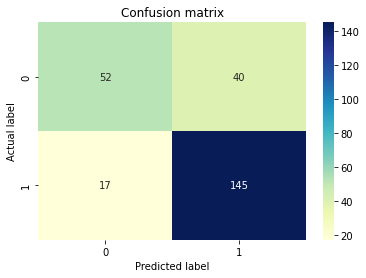

In [15]:
cnf_matrix = confusion_matrix(y_test, Y_pred,labels = [1,0])
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [16]:
y_pred_proba = LR.predict_proba(X_test)
y_pred_proba

array([[0.5669242 , 0.4330758 ],
       [0.76780645, 0.23219355],
       [0.89166523, 0.10833477],
       [0.94156498, 0.05843502],
       [0.75052696, 0.24947304],
       [0.71388768, 0.28611232],
       [0.65950283, 0.34049717],
       [0.90594425, 0.09405575],
       [0.84773449, 0.15226551],
       [0.79010034, 0.20989966],
       [0.61756861, 0.38243139],
       [0.9063767 , 0.0936233 ],
       [0.00577466, 0.99422534],
       [0.25212879, 0.74787121],
       [0.4912819 , 0.5087181 ],
       [0.33501003, 0.66498997],
       [0.73036062, 0.26963938],
       [0.69353534, 0.30646466],
       [0.96844172, 0.03155828],
       [0.84364148, 0.15635852],
       [0.49544129, 0.50455871],
       [0.80892319, 0.19107681],
       [0.04790878, 0.95209122],
       [0.80048875, 0.19951125],
       [0.92164892, 0.07835108],
       [0.63217016, 0.36782984],
       [0.7964583 , 0.2035417 ],
       [0.25080446, 0.74919554],
       [0.88351703, 0.11648297],
       [0.4787458 , 0.5212542 ],
       [0.

In [17]:
from sklearn.preprocessing import binarize

In [18]:
y_pred_default = binarize(y_pred_proba, threshold=0.146)
y_pred_default


array([[1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.

In [19]:
confusion_matrix(y_test, y_pred_default[:,1],labels = [1,0])


array([[91,  1],
       [91, 71]])

In [20]:
def npv_func(th):
 y_pred_low = binarize(y_pred_proba, threshold=th)
 second_column = confusion_matrix(y_test,y_pred_low[:,1],labels=[1,0])[:,1]
 npv = second_column[1]/second_column.sum()
 return npv


In [21]:
npv_func(0.146)

0.9861111111111112

In [22]:
import decimal

def thr(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

thr = list(thr(0, 1, '0.02'))
NPV =[]
for t in thr:
    y_pred_low = binarize(y_pred_proba, threshold=t)
    second_column = confusion_matrix(y_test,y_pred_low[:,1],labels=[1,0])[:,1]
    npv = second_column[1]/second_column.sum()
    NPV.append(npv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [40]:
accuracy_score(y_test, y_pred_default[:,1])


0.6377952755905512

In [ ]:
NPV

[nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9838709677419355,
 0.9857142857142858,
 0.963855421686747,
 0.9444444444444444,
 0.9270833333333334,
 0.9038461538461539,
 0.8888888888888888,
 0.8934426229508197,
 0.890625,
 0.8759124087591241,
 0.8620689655172413,
 0.847682119205298,
 0.8481012658227848,
 0.84472049689441,
 0.8214285714285714,
 0.8265895953757225,
 0.8181818181818182,
 0.8055555555555556,
 0.7923497267759563,
 0.7837837837837838,
 0.7807486631016043,
 0.7777777777777778,
 0.7777777777777778,
 0.7708333333333334,
 0.764102564102564,
 0.766497461928934,
 0.7562189054726368,
 0.7475728155339806,
 0.7289719626168224,
 0.7268518518518519,
 0.7008928571428571,
 0.7035398230088495,
 0.691304347826087,
 0.6866952789699571,
 0.6808510638297872,
 0.6822033898305084,
 0.6778242677824268,
 0.675,
 0.6666666666666666,
 0.6612244897959184,
 0.6612244897959184,
 0.6532258064516129,
 0.6428571428571429,
 0.6403162055335968]

In [30]:
TH_data = pd.DataFrame({'threshold':thr ,' negative predictive value ': NPV  })
TH_data.head(20)

,threshold,negative predictive value
0,0.00,NaN
1,0.02,1.000000
2,0.04,1.000000
3,0.06,1.000000
4,0.08,1.000000
5,0.10,1.000000
6,0.12,0.983871
7,0.14,0.985714
8,0.16,0.963855
9,0.18,0.944444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


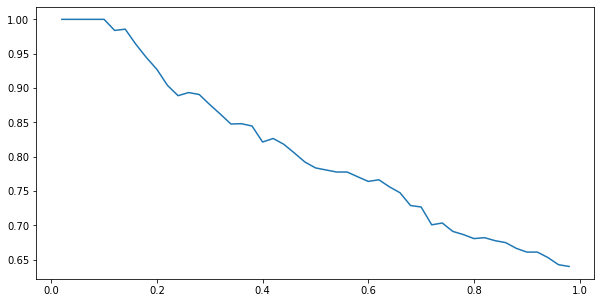

In [31]:
plt.figure(figsize=(10,5))

ths = np.arange(0,1,0.02)
npvs = []
for th in np.arange(0,1.00,0.02):
 npvs.append(npv_func(th))
plt.plot(ths,npvs)


#Receiver operating characteristic – ROC analysis

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])


In [ ]:
ths

array([1.99422534, 0.99422534, 0.84081965, 0.82936511, 0.8241336 ,
       0.80253957, 0.77689677, 0.77601241, 0.74045239, 0.72254176,
       0.69973906, 0.68683772, 0.67587698, 0.67473631, 0.67466816,
       0.66867863, 0.66205327, 0.65489121, 0.63098991, 0.61003632,
       0.59156998, 0.58117247, 0.57249688, 0.56954765, 0.56527727,
       0.53584255, 0.5212542 , 0.5087181 , 0.45203539, 0.44761619,
       0.43492889, 0.40175961, 0.38791709, 0.38175499, 0.37733502,
       0.36493679, 0.3595767 , 0.33451409, 0.32513065, 0.32480481,
       0.32199552, 0.31658412, 0.3165781 , 0.30646466, 0.30302922,
       0.30269614, 0.30244729, 0.29284008, 0.29207254, 0.29063362,
       0.28858295, 0.28423964, 0.28240708, 0.27390496, 0.26963938,
       0.2426244 , 0.23969858, 0.23219355, 0.23105408, 0.22245652,
       0.2202497 , 0.21856405, 0.2138402 , 0.20636679, 0.2055747 ,
       0.2035417 , 0.19951125, 0.19779698, 0.19107681, 0.17056941,
       0.16710234, 0.16201763, 0.15908264, 0.14982979, 0.14804

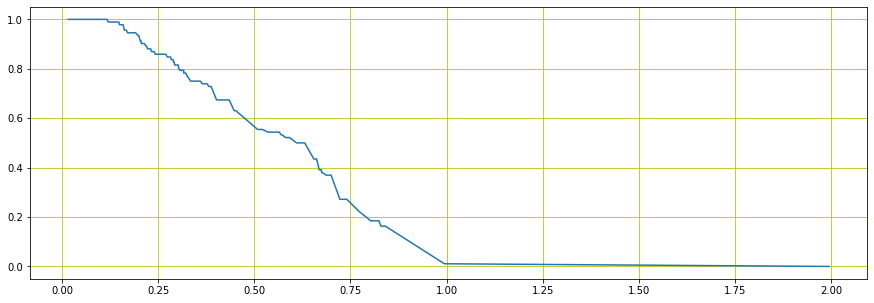

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ths,tpr)
plt.grid(True,color="y" )


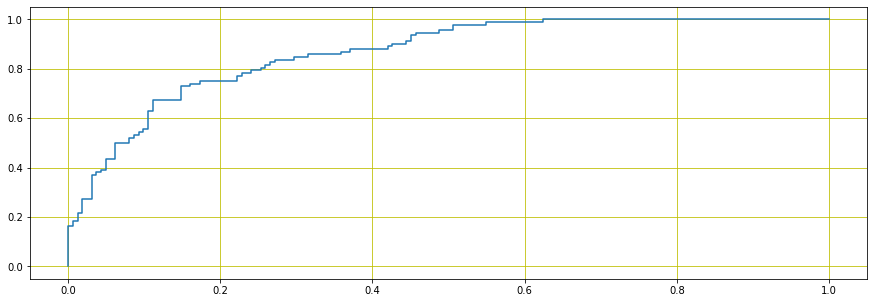

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fpr,tpr)
plt.grid(True,color="y" )


In [ ]:
from sklearn.metrics import auc , roc_auc_score

In [ ]:
roc_auc_score(y_test,Y_pred)

0.7301395598497047

In [ ]:
auc(fpr,tpr)

0.8654052603327965

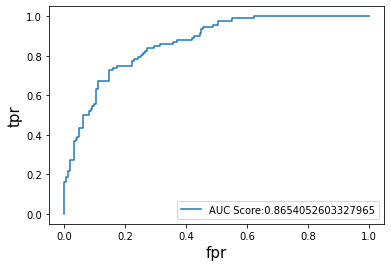

In [ ]:
auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')


## Logistic Regression , support vector classifier and cross validation

In [41]:
X = new_data.drop("Outcome",axis=1)
y = new_data["Outcome"]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=7)


In [46]:
log_model = LogisticRegression(random_state=7)
log_model.fit(X_train_2,y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=7)

In [47]:
svc_clf = SVC(kernel='linear',random_state=7)
svc_clf.fit(X_train_2,y_train_2)


SVC(kernel='linear', random_state=7)

In [48]:
clf = SVC(kernel='linear',random_state=1)
dlf = LogisticRegression(random_state=1)

In [49]:
clf.fit(X_train,y_train)
dlf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [50]:
y_pred = clf.predict(X_test)
pred = dlf.predict(X_test)

In [51]:
svc_pre = svc_clf.predict(X_test_2)
lr_pre = log_model.predict(X_test_2)

In [52]:
accuracy_score(y_test_2,svc_pre)
#svc 2

0.7575757575757576

In [53]:
accuracy_score(y_test_2,lr_pre)
#logistic R

0.7748917748917749

In [54]:
accuracy_score(y_test,y_pred)
#svc


0.7748917748917749

In [55]:
accuracy_score(y_test,pred)
#lr

0.7792207792207793

In [56]:
from sklearn.model_selection import cross_val_score

In [58]:
cvc_score = cross_val_score(svc_clf,X_train,y_train,cv=5)
cvc_score

array([0.71296296, 0.76851852, 0.82242991, 0.73831776, 0.75700935])

In [60]:
lr_score = cross_val_score(log_model,X_train,y_train,cv=5)
lr_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.69444444, 0.78703704, 0.81308411, 0.73831776, 0.76635514])

### Decision Tree classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [64]:
Y_pre = dt.predict(X_test)
Y_pre


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [65]:
accuracy_score(y_test,Y_pre)

0.7229437229437229

In [66]:
dt.score(X_train,y_train)

1.0

In [67]:
dt.score(X_test,y_test)

0.7229437229437229

In [68]:
train_accuracy = []
test_accuracy = []
for depth in range(1,25):
  dt = DecisionTreeClassifier(  criterion='gini' , max_depth=depth , random_state=1)
  dt.fit(X_train,y_train)
  train_accuracy.append(dt.score(X_train,y_train))
  test_accuracy.append(dt.score(X_test,y_test))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [69]:
new_frame = pd.DataFrame({'max_depth':range(1,25) , 'train_acc':train_accuracy , 'test_acc': test_accuracy })
new_frame.head(25)

,max_depth,train_acc,test_acc
0,1,0.729981,0.753247
1,2,0.763501,0.753247
2,3,0.763501,0.753247
3,4,0.783985,0.748918
4,5,0.836127,0.805195
5,6,0.854749,0.779221
6,7,0.901304,0.757576
7,8,0.919926,0.761905
8,9,0.942272,0.696970
9,10,0.964618,0.740260


No handles with labels found to put in legend.


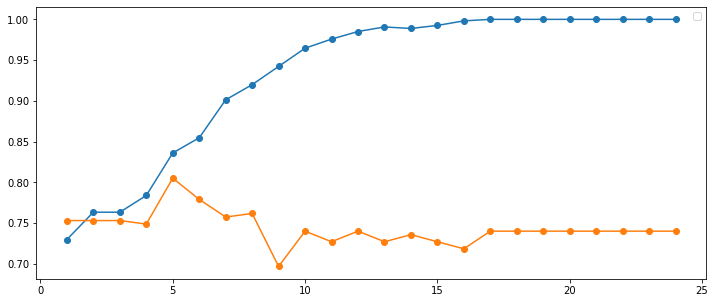

In [70]:
plt.figure(figsize=(12,5))
plt.plot(new_frame['max_depth'], new_frame['train_acc'] , marker='o' )
plt.plot(new_frame['max_depth'], new_frame['test_acc'] , marker='o' )
plt.legend()

In [76]:
dtt = DecisionTreeClassifier(criterion='gini' , max_depth=5 , max_leaf_nodes=9 , random_state=1 )


In [77]:
dtt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=1)

In [78]:
pred = dtt.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [79]:
confusion_matrix(y_test,pred)


array([[130,  16],
       [ 35,  50]])

In [80]:
accuracy_score(y_test,pred)

0.7792207792207793

In [81]:
from sklearn import tree

In [82]:
!pip install graphviz

In [84]:
decision_tree = tree.export_graphviz( dtt , out_file='tree.dot' , feature_names=X_train.columns , max_depth=5 , filled=True )

In [85]:
!dot -Tpng tree.dot -o tree.png

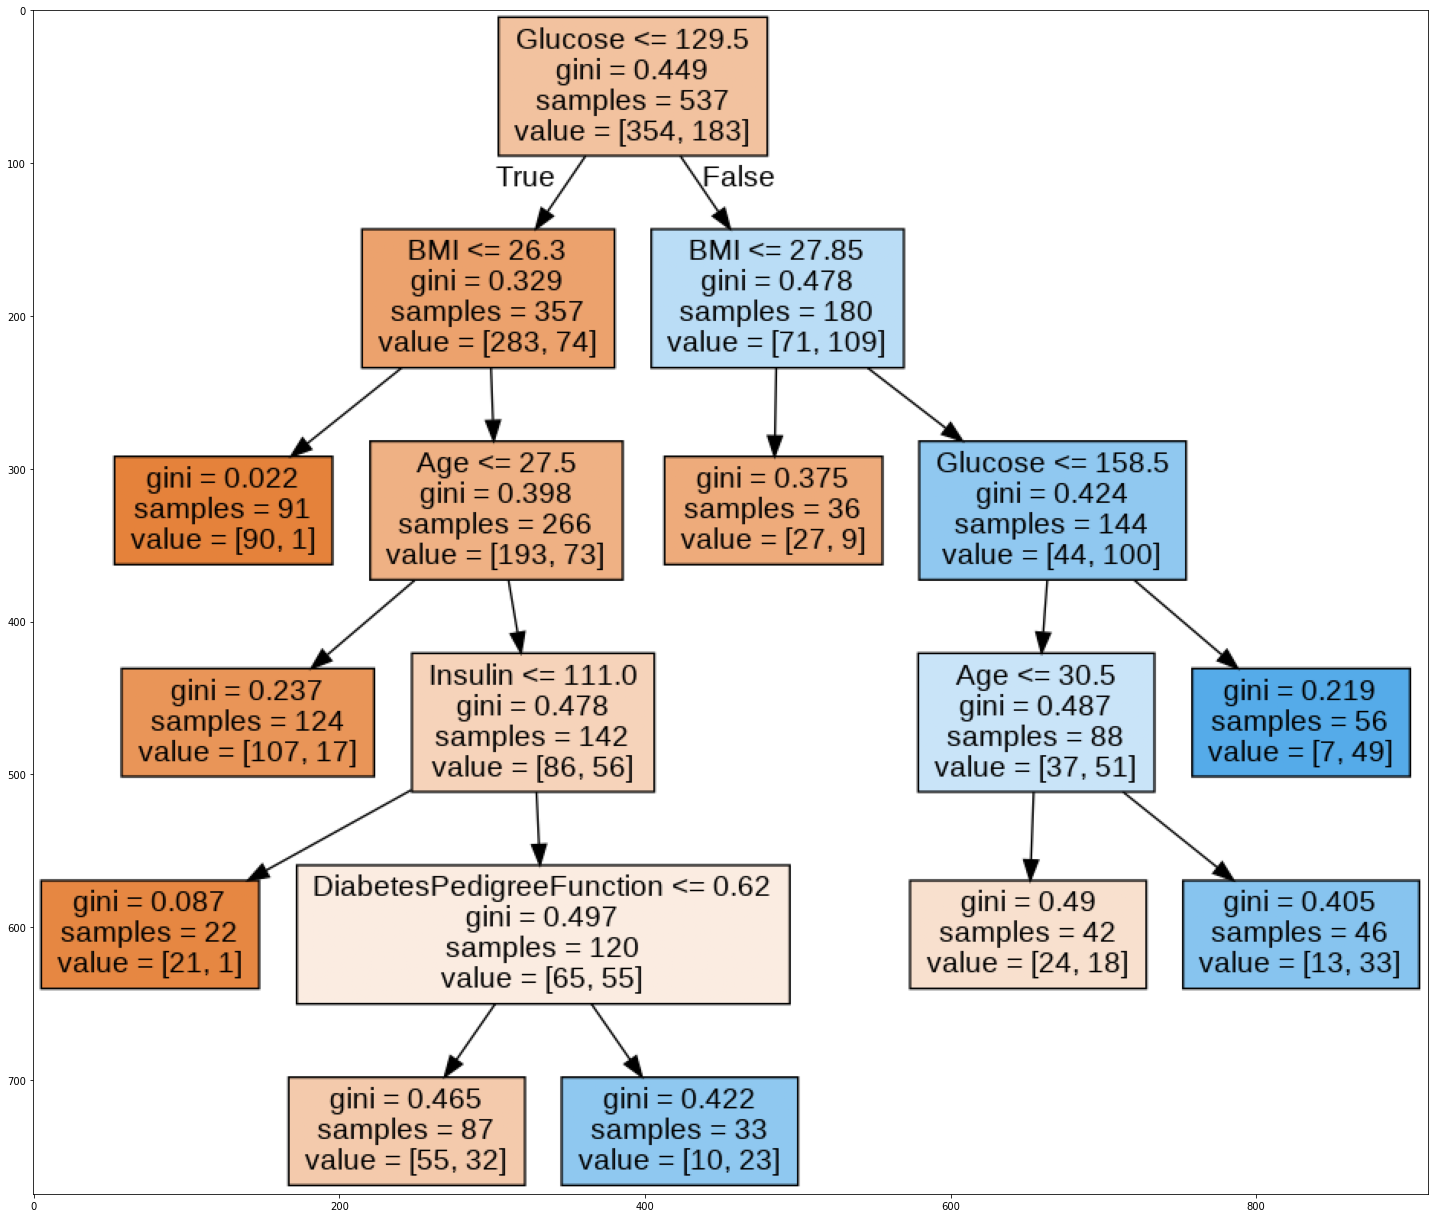

In [86]:
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

In [73]:
train_l = []
test_l = []
for nodes in range(2,25):
  dt = DecisionTreeClassifier(  criterion='gini' , max_leaf_nodes=nodes , random_state=1)
  dt.fit(X_train,y_train)
  train_l.append(dt.score(X_train,y_train))
  test_l.append(dt.score(X_test,y_test))

In [74]:
new_l = pd.DataFrame({'max_leaf_nodes':range(2,25) , 'train_acc':train_l , 'test_acc': test_l })
new_l.head(24)

,max_leaf_nodes,train_acc,test_acc
0,2,0.729981,0.753247
1,3,0.763501,0.753247
2,4,0.763501,0.753247
3,5,0.763501,0.753247
4,6,0.763501,0.753247
5,7,0.763501,0.753247
6,8,0.787709,0.779221
7,9,0.793296,0.787879
8,10,0.802607,0.770563
9,11,0.813780,0.770563


No handles with labels found to put in legend.


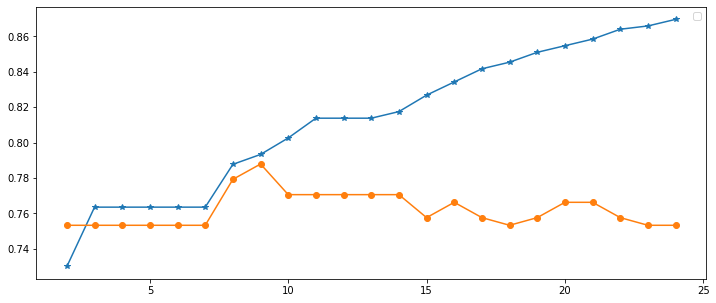

In [75]:
plt.figure(figsize=(12,5))
plt.plot(new_l['max_leaf_nodes'], new_l['train_acc'] , marker='*' )
plt.plot(new_l['max_leaf_nodes'], new_l['test_acc'] , marker='o' )
plt.legend()

### PCA

In [ ]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(new_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(new_data)
scaled_data

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.0158134 , -0.69530596, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [ ]:
from sklearn import decomposition

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_stander = PCA(n_components=8)

In [ ]:
pca_stander.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca_stander.transform(scaled_data)

In [ ]:
scaled_data.shape

(768, 9)

In [ ]:
x_pca.shape

(768, 8)

In [ ]:
pca = decomposition.PCA()
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
data_pca = pca.fit_transform(X)
data_pca[:5]

array([[-10.82201639,  30.56934767,   5.95532791,  -9.66742888,
          8.86159178,   0.57222453,  -0.57094891,   0.10968776],
       [-21.58822347, -34.34447862,  -0.16904163,  -3.10288209,
          1.73929805,   3.93188805,  -2.49739606,  -0.07289047],
       [ -5.73330247,  60.25927924, -19.79086125,  -6.30179383,
         -1.09154572,   7.81566461,   4.5247856 ,   0.22078591],
       [-51.74455481, -26.96738425,  -8.24948576,   2.52962311,
         -4.6504084 ,   0.62842136,  -0.86361085,  -0.2426783 ],
       [ 29.42617216,   6.95191677, -24.46267249,  -7.74539185,
         22.85773116,  -9.35247679,  -3.51034557,   1.63564836]])

In [ ]:
pca.explained_variance_ratio_

array([8.68286533e-01, 8.72696230e-02, 1.97735396e-02, 1.19875744e-02,
       9.01706893e-03, 2.77212855e-03, 8.81646980e-04, 1.18857516e-05])

In [ ]:
pca = decomposition.PCA(n_components=3)
data_pca_first = pca.fit_transform(X)
data_pca_first.shape


(768, 3)

In [ ]:
data_pca_first

array([[-10.82201639,  30.56934767,   5.95532791],
       [-21.58822347, -34.34447862,  -0.16904163],
       [ -5.73330247,  60.25927924, -19.79086125],
       ...,
       [-28.63827739,   2.95595853,  -4.30179533],
       [-14.69213687,   6.80934977,  -2.50348346],
       [-20.28859528, -26.87623968,  -2.70276854]])

Text(0.5, 1.0, 'After PCA')

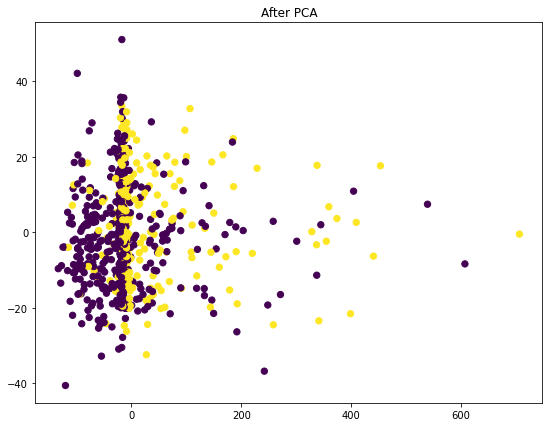

In [ ]:
fig = plt.figure(figsize=(20,7))
# ax = fig.add_subplot(121)
# ax.scatter(pca[:,0],pca[:,7],c=y,s=40)
# ax.set_title('Before PCA')


ax2 = fig.add_subplot(122)
ax2.scatter(data_pca_first[:,0],data_pca_first[:,2],c=y,s=40)
ax2.set_title('After PCA')

Text(0.5, 1.0, 'After PCA')

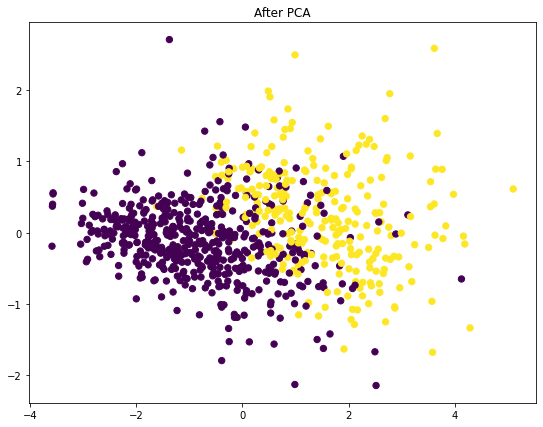

In [ ]:
fig = plt.figure(figsize=(20,7))
ax2 = fig.add_subplot(122)
ax2.scatter(x_pca[:,0],x_pca[:,7],c=y,s=40)
ax2.set_title('After PCA')

### K Nearest Neighbour

In [87]:
X = new_data.drop("Outcome",axis=1)
y = new_data["Outcome"]

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)


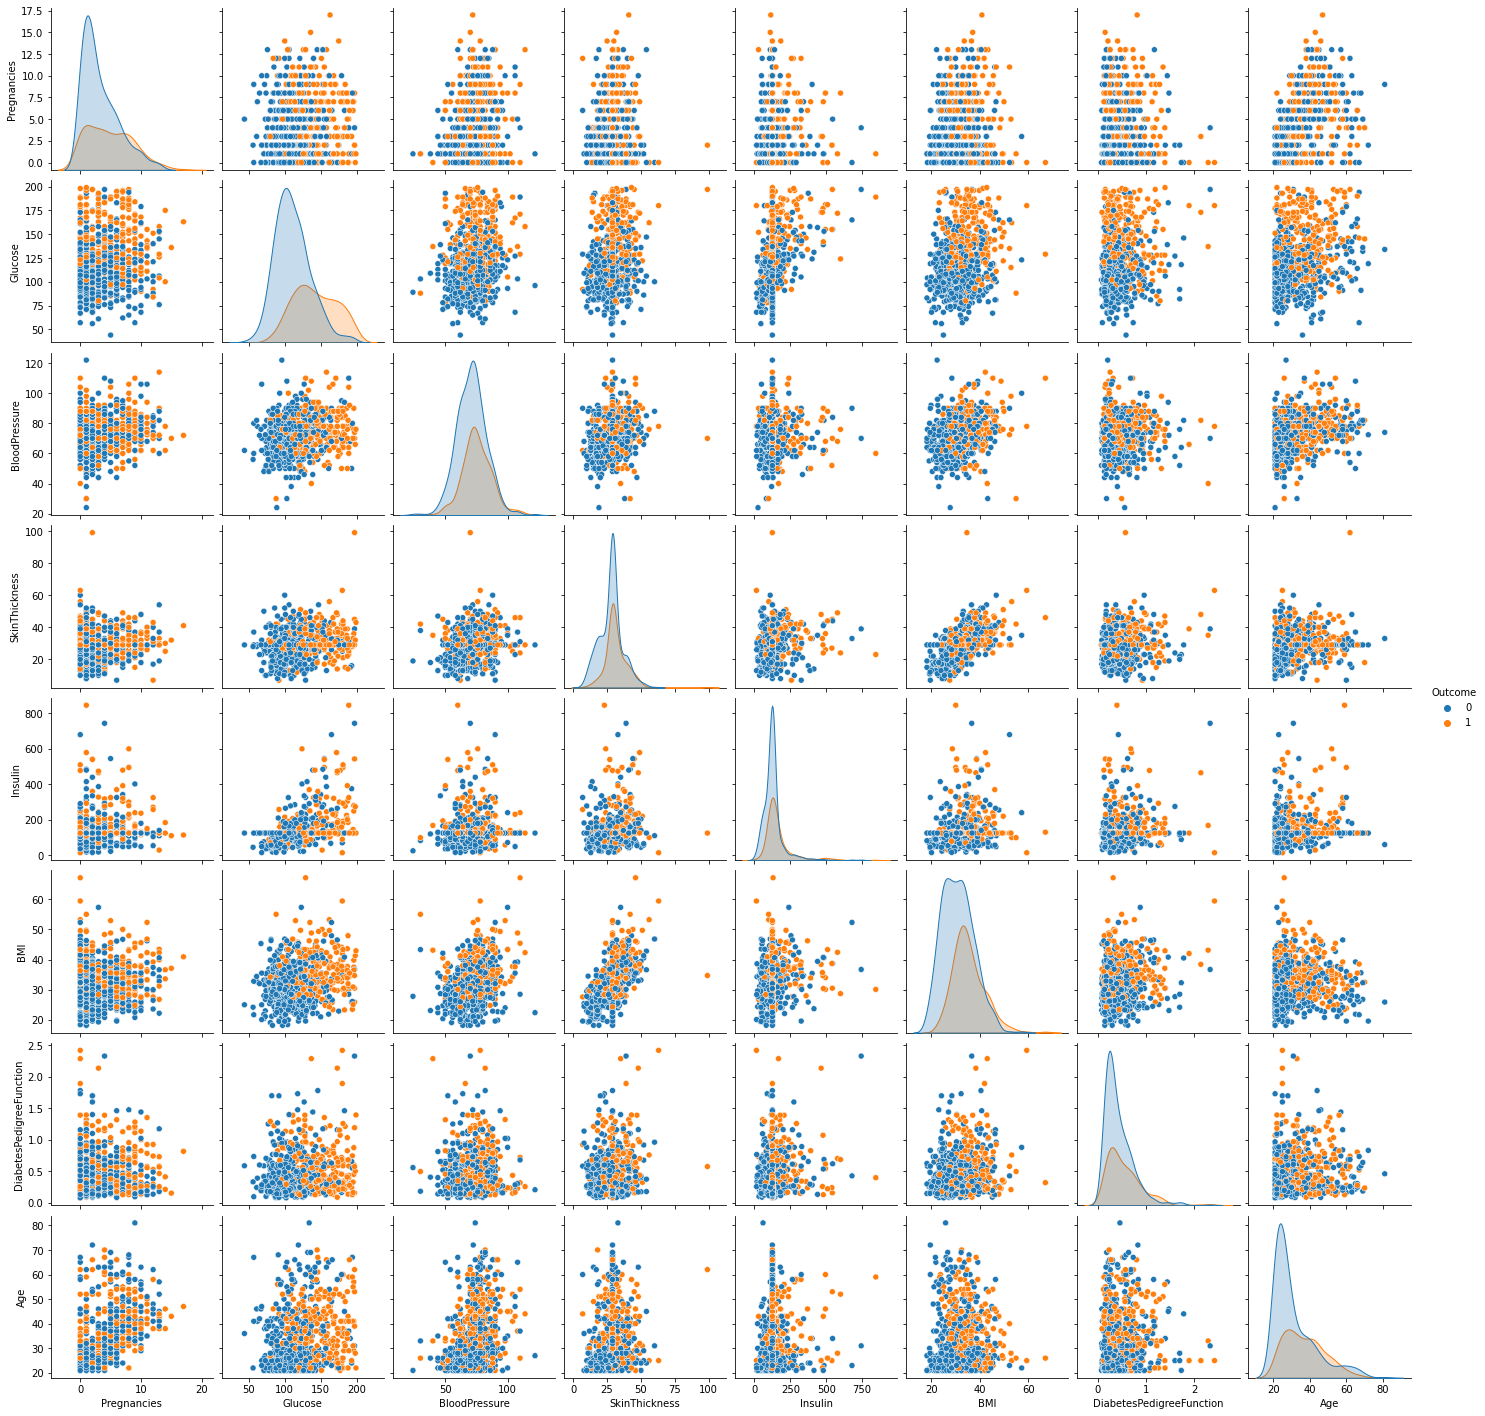

In [90]:
sns.pairplot(new_data,hue='Outcome')

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=22)

In [94]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [95]:
k_pred = knn.predict(X_test)
k_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [96]:
k_pred_proba = knn.predict_proba(X_test)
k_pred_proba

array([[0.59090909, 0.40909091],
       [0.5       , 0.5       ],
       [0.86363636, 0.13636364],
       [0.90909091, 0.09090909],
       [0.59090909, 0.40909091],
       [0.68181818, 0.31818182],
       [0.63636364, 0.36363636],
       [0.90909091, 0.09090909],
       [0.77272727, 0.22727273],
       [0.77272727, 0.22727273],
       [0.59090909, 0.40909091],
       [0.86363636, 0.13636364],
       [0.90909091, 0.09090909],
       [0.40909091, 0.59090909],
       [0.86363636, 0.13636364],
       [0.40909091, 0.59090909],
       [0.77272727, 0.22727273],
       [0.90909091, 0.09090909],
       [0.95454545, 0.04545455],
       [1.        , 0.        ],
       [0.45454545, 0.54545455],
       [0.95454545, 0.04545455],
       [0.27272727, 0.72727273],
       [0.54545455, 0.45454545],
       [0.95454545, 0.04545455],
       [0.45454545, 0.54545455],
       [0.59090909, 0.40909091],
       [0.27272727, 0.72727273],
       [0.90909091, 0.09090909],
       [0.5       , 0.5       ],
       [0.

In [97]:
from sklearn.metrics import confusion_matrix  , accuracy_score
from sklearn.model_selection import cross_val_score

In [98]:
confusion_matrix(y_test,k_pred)

array([[131,  15],
       [ 36,  49]])

In [99]:
accuracy_score(y_test,k_pred)

0.7792207792207793

Text(0.5, 15.0, 'Predicted label')

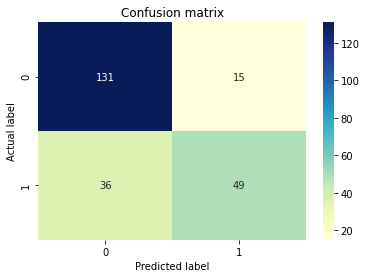

In [ ]:
cnf_matrix = confusion_matrix(y_test, k_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
accuracy_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn , X , y , cv=10)
  accuracy_rate.append(score.mean())

In [101]:
Accuracy_Score = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = accuracy_score(y_test,k_pred)
  Accuracy_Score.append(score.mean())

In [ ]:
Accuracy_Score

[0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793]

In [ ]:
accuracy_rate

[0.6966165413533834,
 0.7227785372522215,
 0.7044429254955571,
 0.7253246753246754,
 0.7200786056049214,
 0.7331339712918661,
 0.7201469583048532,
 0.7487867395762133,
 0.7475563909774436,
 0.7488209159261793,
 0.7422761449077239,
 0.7462235133287766,
 0.7435577580314423,
 0.7474709501025292,
 0.7422248803827752,
 0.7396958304853042,
 0.7436090225563909,
 0.7475393028024608,
 0.7396958304853042,
 0.7370984278879016,
 0.7488209159261793,
 0.7514695830485304,
 0.7423615857826384,
 0.7449248120300752,
 0.7462576896787423,
 0.748838004101162,
 0.743626110731374,
 0.7397129186602871,
 0.7371496924128503,
 0.7410116199589885,
 0.7396958304853042,
 0.7383800410116199,
 0.744958988380041,
 0.7475393028024608,
 0.7488380041011621,
 0.7423274094326726,
 0.7449419002050581,
 0.7449248120300752,
 0.7358339029391661]

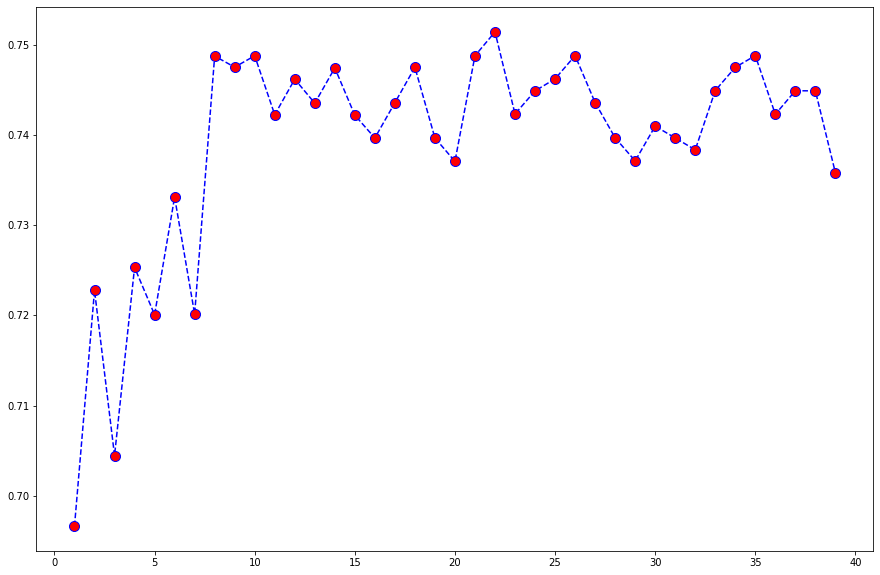

In [102]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)

In [104]:
knn_frame = pd.DataFrame({'n_neighbour':range(1,40) , 'accuracy':accuracy_rate })
knn_frame.head(40)

# knn_frame = pd.DataFrame({'n_neighbour':range(1,40) , 'accuracy':Accuracy_Score })
# knn_frame.head(40)

,n_neighbour,accuracy
0,1,0.696617
1,2,0.722779
2,3,0.704443
3,4,0.725325
4,5,0.720079
5,6,0.733134
6,7,0.720147
7,8,0.748787
8,9,0.747556
9,10,0.748821


In [105]:
from sklearn.metrics import roc_curve , roc_auc_score , auc
# k_pred_proba = knn.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, k_pred_proba)

In [106]:
fpr, tpr, ths = roc_curve(y_test, k_pred_proba[:,1])


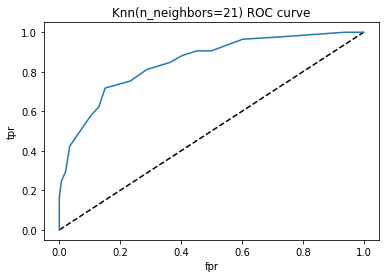

In [107]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=21) ROC curve')
plt.show()

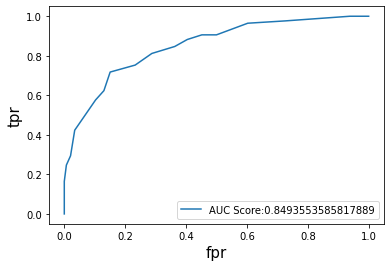

In [108]:
auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')


In [109]:
roc_auc_score(y_test,k_pred_proba[:,1])

0.8493553585817889

### Let's Do Some Predictive Modeling

In [ ]:
from sklearn import svm
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = new_data.drop("Outcome",axis=1)
y = new_data["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)


In [ ]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= rbf is 0.7662337662337663
Accuracy for SVM kernel= linear is 0.7748917748917749
